In [1]:
%matplotlib inline

In [2]:
import numpy as np
from astropy import units as u

In [3]:
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)

In [4]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube

In [5]:
import os
os.chdir("/lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/imaging_results")

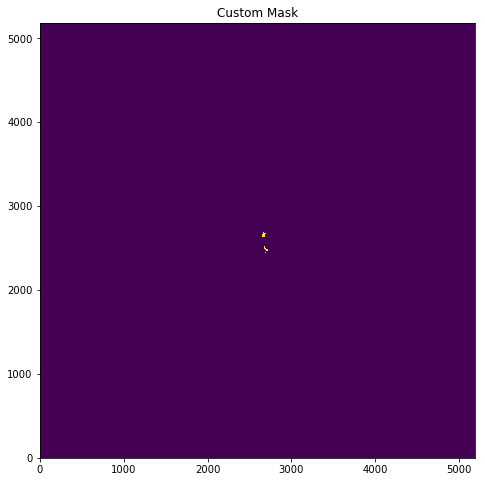

In [6]:
mask = SpectralCube.read('W51-E_B3_clean_mask.mask', format='casa_image')[0]
pl.imshow(mask.value, origin='lower', interpolation='none')
pl.title("Custom Mask")

In [7]:
imgs_before_b3, cubes_before_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0')
imgs_after_b3, cubes_after_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal1')
imgs_after2_b3, cubes_after2_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal2')

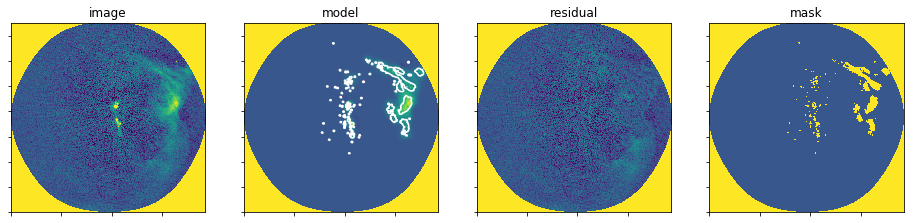

In [8]:
show(imgs_before_b3, vmin=-0.001, vmax=0.01)

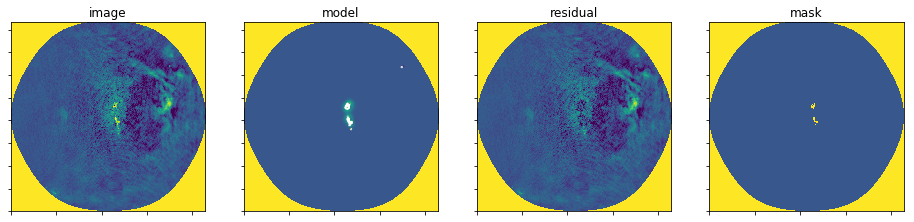

In [9]:
show(imgs_after_b3, vmin=-0.001, vmax=0.01)

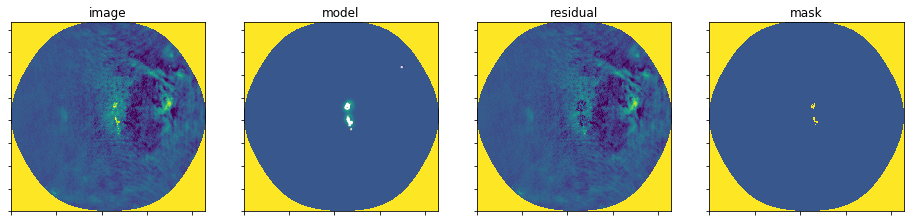

In [10]:
show(imgs_after2_b3, vmin=-0.001, vmax=0.01)

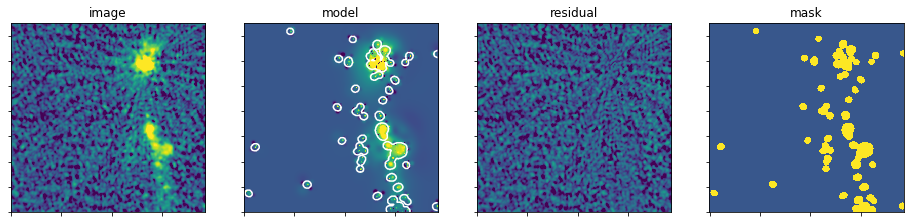

In [11]:
show(imgs_before_b3, vmin=-0.001, vmax=0.01, zoom=0.2)

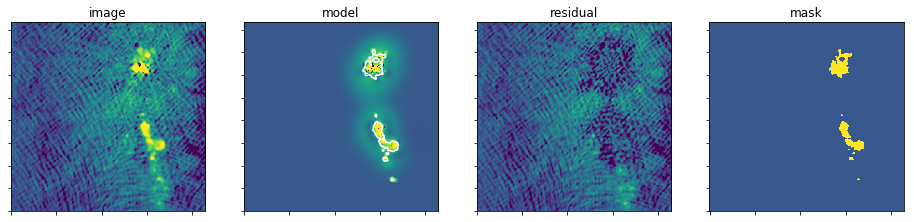

In [12]:
show(imgs_after_b3, vmin=-0.001, vmax=0.01, zoom=0.2)

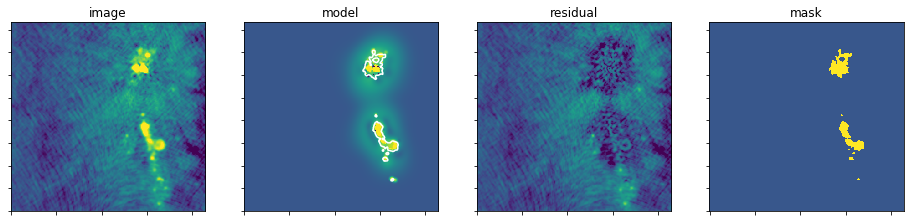

In [13]:
show(imgs_after2_b3, vmin=-0.001, vmax=0.01, zoom=0.2)

In [14]:
for imgs in (imgs_before_b3, imgs_after_b3, imgs_after2_b3):
    rms = np.nanstd(imgs['residual'].value*u.Jy/u.beam) # residual has bad header units
    peak = np.nanmax(imgs['image'].quantity)
    print(f"peak/rms = {peak/rms:0.1f}, peak={peak:0.3f}, rms={rms:0.5f}")

peak/rms = 635.8, peak=0.265 Jy / beam, rms=0.00042 Jy / beam
peak/rms = 926.1, peak=0.386 Jy / beam, rms=0.00042 Jy / beam
peak/rms = 1054.4, peak=0.405 Jy / beam, rms=0.00038 Jy / beam
